In [1]:
# Dependencies and Setup
# Water consumption
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path


In [2]:
# File to Load (Remember to Change These)
path = Path("Resources/austin_water.csv")
customer_data_df = pd.read_csv(path)
customer_data_df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500


In [3]:
# Filter the data to only include the data for years 2013-2017

customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')

filtered_data = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]

filtered_data

# Making the date an index
date_index_df = filtered_data.set_index('Year Month', inplace=False)

In [4]:
# Grouping by Customer Class and Time
cust_class_totals = filtered_data.groupby(['Customer Class'])['Total Gallons'].sum()

time_totals = filtered_data.groupby(['Year Month'])['Total Gallons'].sum()

#time_totals
cust_class_totals

Customer Class
Irrigation - Multi-Family     3871926600
Irrigation - Residential       197562900
Multi-Family                 41908434000
Residential                  71727421200
Name: Total Gallons, dtype: int64

In [5]:
# Sorting for time
time_sort = time_totals.sort_values(ascending=False)

time_sort

Year Month
2015-08-01    2763112500
2015-09-01    2684620600
2013-09-01    2593170700
2014-09-01    2564459200
2017-08-01    2547847000
2013-08-01    2534850100
2013-07-01    2491107800
2016-08-01    2470237400
2017-07-01    2466226200
2016-07-01    2415686400
2015-10-01    2401311400
2014-08-01    2358940000
2017-09-01    2353679000
2016-09-01    2156562700
2014-07-01    2134472900
2016-10-01    2107208900
2013-06-01    2104754100
2017-06-01    2098386200
2015-07-01    2033398200
2013-05-01    2019089400
2017-10-01    2018448000
2013-10-01    2017698100
2014-06-01    2005111400
2014-05-01    1985723400
2017-05-01    1979500400
2016-11-01    1947654300
2014-11-01    1945344400
2013-01-01    1907330000
2014-10-01    1904262000
2013-04-01    1875674700
2017-11-01    1867682000
2016-06-01    1856758200
2015-11-01    1849563900
2014-04-01    1779458600
2015-01-01    1776078100
2016-04-01    1770805400
2014-01-01    1761888000
2016-12-01    1761018500
2017-01-01    1754559800
2013-03-01    

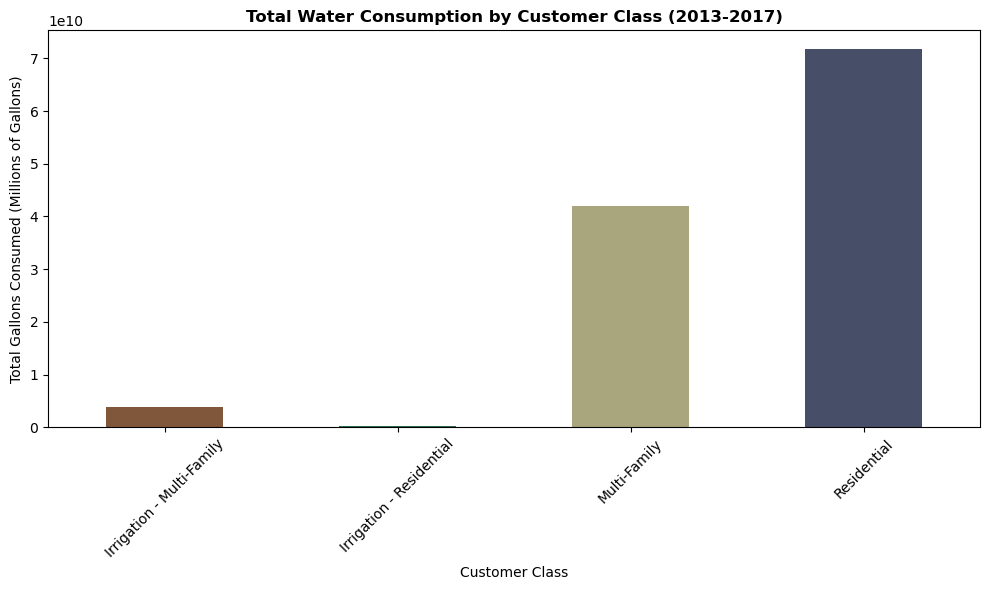

In [6]:
# Creating bar graph for Customer Class totals

plt.figure(figsize=(10, 6))
cust_class_totals.plot(kind='bar', color=["#81573B", "#2E6D4F", "#A9A57C", "#464E68"])
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
plt.title('Total Water Consumption by Customer Class (2013-2017)', weight="bold")

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Create line plot 
#filtered_data['Total Gallons'].plot(kind='line',figsize=(10, 5))
#plt.xlabel('Year')
#plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
#plt.title('Top 10 Year Month with Highest Water Consumption (2013-2017)')



In [8]:
#Filtering for Multi-Family Customer Class

m_fam_data = filtered_data[(filtered_data['Customer Class'] == 'Multi-Family')]

m_fam_totals = m_fam_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

m_fam_totals


Customer Class  Year Month
Multi-Family    2013-01-01    707732600
                2013-02-01    626891400
                2013-03-01    634054000
                2013-04-01    653163100
                2013-05-01    683950800
                2013-06-01    689307600
                2013-07-01    703111300
                2013-08-01    737141200
                2013-09-01    730880400
                2013-10-01    707116300
                2013-11-01    679878700
                2013-12-01    652592900
                2014-01-01    712447500
                2014-02-01    628043600
                2014-03-01    617660100
                2014-04-01    655641400
                2014-05-01    658407200
                2014-06-01    685999300
                2014-07-01    694363100
                2014-08-01    705901900
                2014-09-01    751096100
                2014-10-01    674990700
                2014-11-01    701241900
                2014-12-01    665498300
             

In [9]:
#Filtering for Residential Customer Class

residential_data = filtered_data[(filtered_data['Customer Class'] == 'Residential')]

residential_totals = residential_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

residential_totals

Customer Class  Year Month
Residential     2013-01-01    1153857500
                2013-02-01     957068300
                2013-03-01    1069386600
                2013-04-01    1169094100
                2013-05-01    1269357300
                2013-06-01    1343032600
                2013-07-01    1696994000
                2013-08-01    1698762900
                2013-09-01    1762315900
                2013-10-01    1234582300
                2013-11-01     996318500
                2013-12-01     936570300
                2014-01-01    1024850200
                2014-02-01     892156200
                2014-03-01     897475200
                2014-04-01    1078080000
                2014-05-01    1265354900
                2014-06-01    1247636400
                2014-07-01    1362417100
                2014-08-01    1560833400
                2014-09-01    1707122900
                2014-10-01    1148533600
                2014-11-01    1181816100
                2014-12-01    

In [10]:
# Filtering for any zip code including Irrigation - Multi-Family Customer Class

irr_m_fam_data = filtered_data[(filtered_data['Customer Class'] == 'Irrigation - Multi-Family')]

irr_m_fam_totals = irr_m_fam_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

irr_m_fam_totals

Customer Class             Year Month
Irrigation - Multi-Family  2013-01-01     43074300
                           2013-02-01     37587300
                           2013-03-01     40331000
                           2013-04-01     50158700
                           2013-05-01     62340500
                           2013-06-01     68847100
                           2013-07-01     85909600
                           2013-08-01     93580500
                           2013-09-01     94209800
                           2013-10-01     72288200
                           2013-11-01     49159700
                           2013-12-01     25659800
                           2014-01-01     22911400
                           2014-02-01     17238800
                           2014-03-01     24106900
                           2014-04-01     43282600
                           2014-05-01     58372300
                           2014-06-01     68154800
                           2014-07-01     74

In [11]:
# Filtering for any zip code including Irrigation - Residential Customer Class

irr_res_data = filtered_data[(filtered_data['Customer Class'] == 'Irrigation - Residential')]

irr_res_totals = irr_res_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

irr_res_totals


Customer Class            Year Month
Irrigation - Residential  2013-01-01    2665600
                          2013-02-01    2038500
                          2013-03-01    3061100
                          2013-04-01    3258800
                          2013-05-01    3440800
                          2013-06-01    3566800
                          2013-07-01    5092900
                          2013-08-01    5365500
                          2013-09-01    5764600
                          2013-10-01    3711300
                          2013-11-01    1948400
                          2013-12-01    1463200
                          2014-01-01    1678900
                          2014-02-01    1516200
                          2014-03-01    1770200
                          2014-04-01    2454600
                          2014-05-01    3589000
                          2014-06-01    3320900
                          2014-07-01    3681400
                          2014-08-01    4669500
   

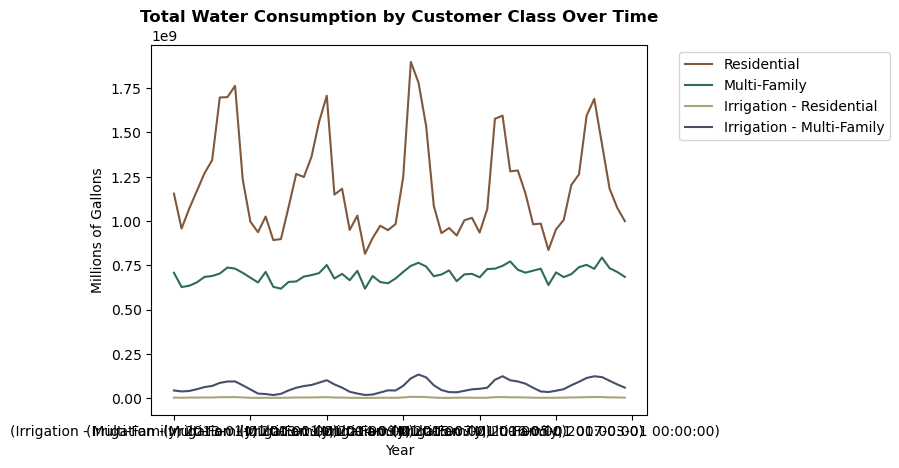

In [14]:
# Plotting the filtered datasets for each customer class
residential_totals.plot(color="#81573B")
m_fam_totals.plot(color="#2E6D4F")
irr_res_totals.plot(color="#A9A57C")
irr_m_fam_totals.plot(color="#464E68")

# Setting the labels and title
plt.xlabel('Year')
plt.ylabel('Millions of Gallons')
plt.title('Total Water Consumption by Customer Class Over Time', weight="bold")

plt.legend(['Residential', 'Multi-Family','Irrigation - Residential', 'Irrigation - Multi-Family'], bbox_to_anchor=(1.05, 1))



